In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data Understanding

In [2]:
df = pd.read_csv('D:/COAPPS INTERN/Healthcare_Dataset (Classification Dataset).csv')

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,01-12-2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,15-06-2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,09-01-2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,08-02-2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,03-05-2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,09-07-2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,02-08-2021,Paracetamol,Normal


In [4]:
df.shape

(10000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112565,299.000000
75%,68.000000,37733.913725,400.000000
max,85.000000,49995.902280,500.000000


# Data Cleaning

In [7]:
df.drop(['Name','Date of Admission','Doctor','Hospital','Insurance Provider','Billing Amount','Room Number','Admission Type','Discharge Date'],axis=1,inplace = True)

In [8]:
df

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,Female,O-,Diabetes,Aspirin,Inconclusive
1,35,Male,O+,Asthma,Lipitor,Normal
2,61,Male,B-,Obesity,Lipitor,Normal
3,49,Male,B-,Asthma,Penicillin,Abnormal
4,51,Male,O-,Arthritis,Paracetamol,Normal
...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,Ibuprofen,Abnormal
9996,47,Female,AB+,Arthritis,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,Ibuprofen,Normal
9998,84,Male,A+,Arthritis,Penicillin,Normal


In [9]:
df.isnull().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Medication           0
Test Results         0
dtype: int64

In [10]:
df.duplicated().sum()

470

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(9530, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9530 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                9530 non-null   int64 
 1   Gender             9530 non-null   object
 2   Blood Type         9530 non-null   object
 3   Medical Condition  9530 non-null   object
 4   Medication         9530 non-null   object
 5   Test Results       9530 non-null   object
dtypes: int64(1), object(5)
memory usage: 521.2+ KB


In [14]:
df.isnull().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Medication           0
Test Results         0
dtype: int64

In [15]:
df.nunique()

Age                  68
Gender                2
Blood Type            8
Medical Condition     6
Medication            5
Test Results          3
dtype: int64

In [16]:
df.describe(include = 'O')

,Gender,Blood Type,Medical Condition,Medication,Test Results
count,9530,9530,9530,9530,9530
unique,2,8,6,5,3
top,Female,AB-,Asthma,Penicillin,Abnormal
freq,4847,1218,1642,1979,3281


In [17]:
df.describe()

,Age
count,9530.000000
mean,51.469885
std,19.597824
min,18.000000
25%,35.000000
50%,52.000000
75%,68.000000
max,85.000000


# Exploratory Data Analysis

In [18]:
for column in df.columns:
    unique_values = df[column].unique()
    print(unique_values)

[81 35 61 49 51 41 82 55 33 39 45 23 85 72 65 32 64 66 80 79 54 26 70 74
 56 37 78 83 30 19 46 48 34 84 47 60 57 21 27 68 31 42 71 38 28 43 69 73
 67 44 20 59 76 40 36 29 53 77 24 75 25 62 52 50 22 63 58 18]
['Female' 'Male']
['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
['Inconclusive' 'Normal' 'Abnormal']


In [19]:
df['Age'].value_counts().idxmax()

59

In [20]:
df['Age'].value_counts().idxmin()

47

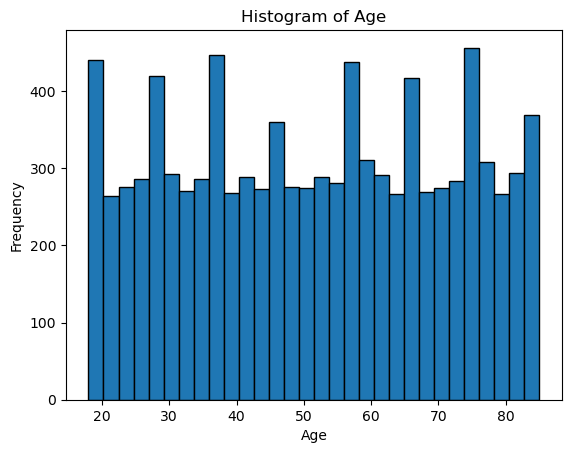

In [21]:
plt.hist(df['Age'],bins=30,edgecolor="black")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.show()

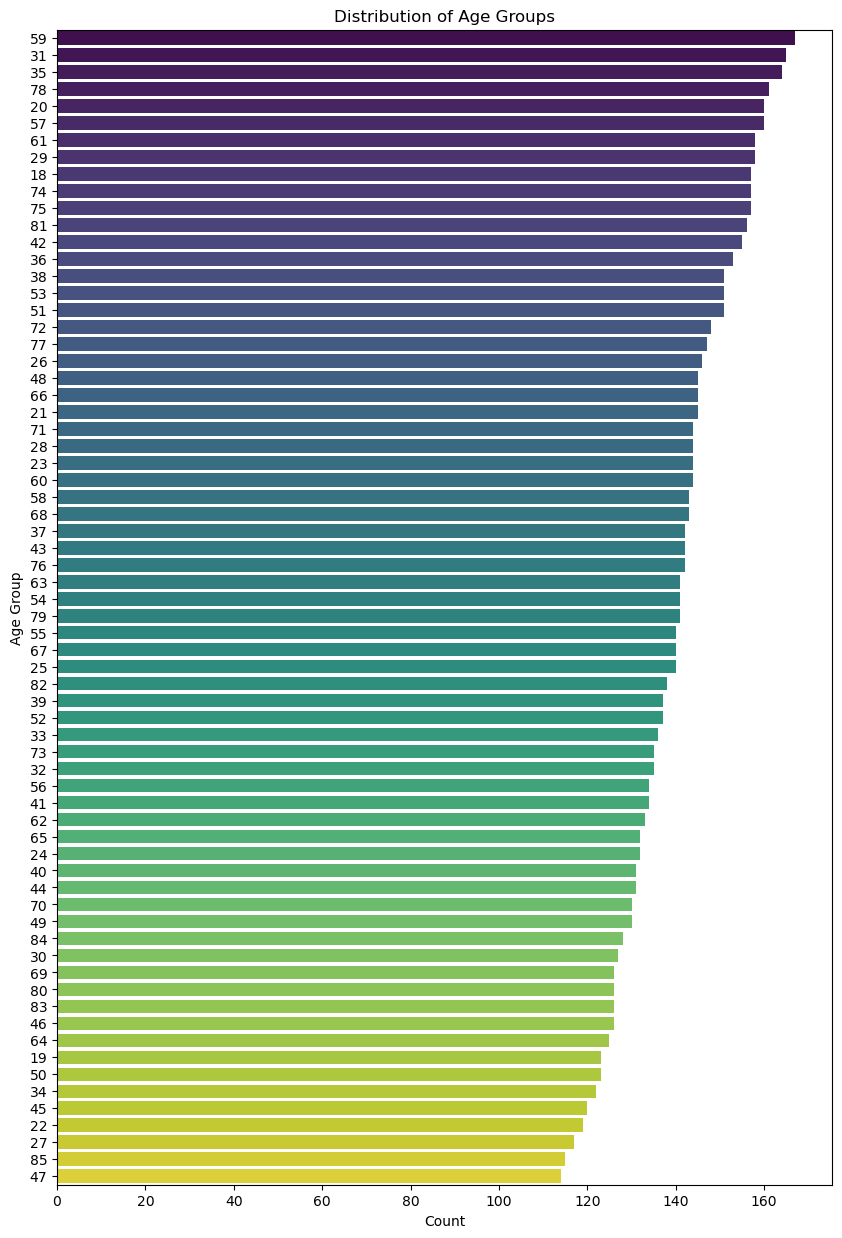

In [22]:
plt.figure(figsize=(10, 15))
sns.countplot(y='Age', data=df, order=df['Age'].value_counts().index, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

Female    4847
Male      4683
Name: Gender, dtype: int64


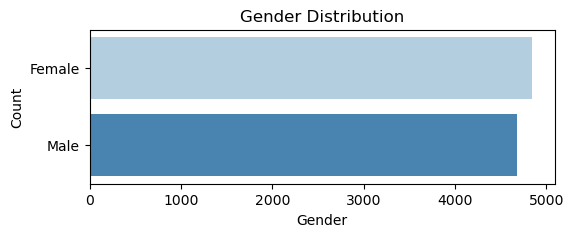

In [23]:
print(df.Gender.value_counts())

plt.figure(figsize=(6,2))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index, palette='Blues')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Penicillin     1979
Lipitor        1918
Ibuprofen      1892
Aspirin        1873
Paracetamol    1868
Name: Medication, dtype: int64


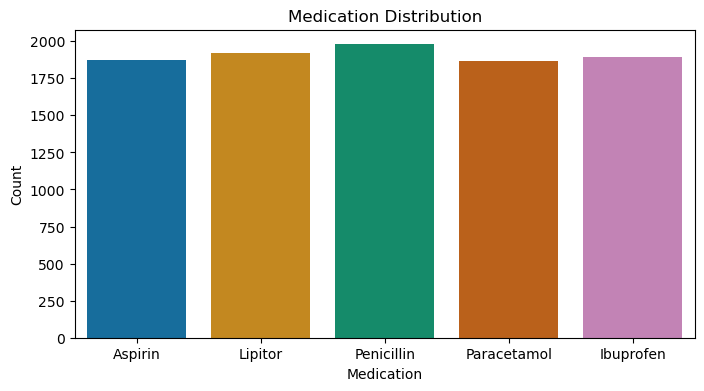

In [24]:
print(df['Medication'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x='Medication', data=df, palette='colorblind')
plt.title('Medication Distribution')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.show()

Asthma          1642
Cancer          1629
Hypertension    1599
Arthritis       1576
Obesity         1547
Diabetes        1537
Name: Medical Condition, dtype: int64


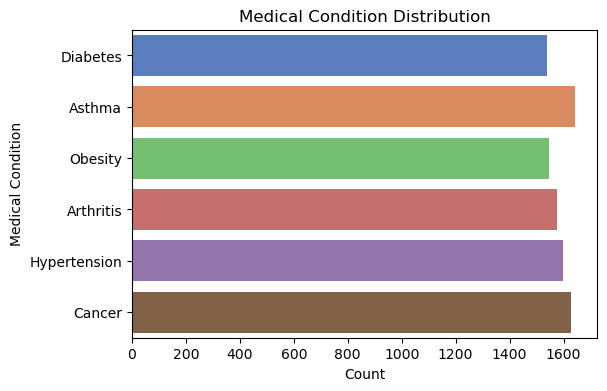

In [25]:
print(df['Medical Condition'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(y='Medical Condition', data=df, palette='muted')
plt.title('Medical Condition Distribution')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

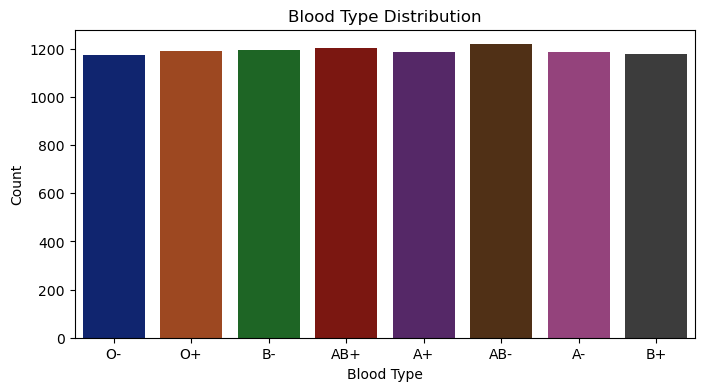

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Blood Type', data=df, palette='dark')
plt.title('Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()

In [28]:
df = df.iloc[:, [0, 1, 2, 3, 5, 4]] 

In [29]:
df

,Age,Gender,Blood Type,Medical Condition,Test Results,Medication
0,81,Female,O-,Diabetes,Inconclusive,Aspirin
1,35,Male,O+,Asthma,Normal,Lipitor
2,61,Male,B-,Obesity,Normal,Lipitor
3,49,Male,B-,Asthma,Abnormal,Penicillin
4,51,Male,O-,Arthritis,Normal,Paracetamol
...,...,...,...,...,...,...
9994,69,Male,A+,Diabetes,Inconclusive,Penicillin
9995,83,Male,A+,Obesity,Abnormal,Ibuprofen
9996,47,Female,AB+,Arthritis,Normal,Ibuprofen
9997,54,Male,B-,Arthritis,Normal,Ibuprofen


# Preprocessing and Data Splitting 

In [30]:
from sklearn.model_selection import train_test_split
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition','Test Results']
numerical_columns = ['Age']

X = df[categorical_columns + numerical_columns]
y = df['Medication']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns,)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)